# Analysis of Arduino Analog Pin Data
Author: Abrar Sheikh (2/16/2023)

Here we analyze Arduino analog pin data (which will usually be in the form of voltage) and produce plots of voltage vs time.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import math

In [3]:
filename = "3 cell voltage discharge"
scaling = 1.0

In [4]:
def toList(string):
    #This function converts a string separated by commas into a list
    ans = []
    ind = 0
    oldComma = -1
    stringg = str(string)
    newComma = stringg.find(',',oldComma+1)
    while newComma>0:
        ans.append(float(stringg[oldComma+1:newComma]))
        oldComma = newComma
        newComma = stringg.find(',',oldComma+1)
    ans.append(float(stringg[oldComma+1:]))
    return ans

def correct(listed): 
    #This will correct a numpy array of strings (where each string represents a numpy array) into a 2D numpy array
    ans = []
    for i in range(len(listed)):
        ans.append(toList(listed[i][0]))
    ans = np.array(ans)
    return ans

def getData(filename):
    # reading data from a csv file
	with open(filename+'.csv', newline='') as file:
		reader = csv.reader(file, delimiter = ' ')
		
		
		# output list to store all rows
		Output = []
		for row in reader:
			Output.append(row[:])
	Output = np.array(Output)[1:]
	return correct(Output)

In [5]:
#We assume that the data in the CSV file is stored in format "time, value, maxValue"

data = getData(filename)
print(data)

[[3.40000e+01 6.00000e-01 8.30000e-01]
 [4.60000e+01 5.60000e-01 8.30000e-01]
 [5.60000e+01 5.20000e-01 8.30000e-01]
 ...
 [1.86870e+05 7.60000e-01 8.30000e-01]
 [1.86889e+05 8.20000e-01 8.30000e-01]
 [1.86907e+05 7.80000e-01 8.30000e-01]]


In [6]:
np.shape(data)

(10341, 3)

In [7]:
times = data[:,0]/1000
vals = data[:,1]*scaling
maxVal = max(data[:,2])*scaling

In [24]:
def avgg(listed, n):
    #Gets rid of Vpp and shows average voltage
    ans = []
    for i in range(int(len(listed)/n)):
        ans.append(np.sum(listed[n*i:(i+1)*n])/n)
    return np.array(ans)

[2. 3. 4.]


In [18]:
print(times[4]-times[3])

0.010999999999999996


Maximum Voltage: 0.83


Text(0.5, 1.0, 'Voltage Readings vs Time')

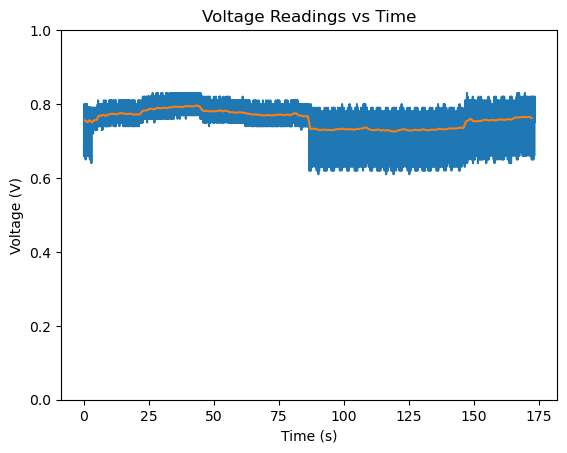

In [29]:
print("Maximum Voltage:", maxVal)
start = 800
plt.plot(times[start:]-times[start], vals[start:])
plt.plot(avgg(times[start:], 50)-times[start], avgg(vals[start:],50))
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.ylim(0, 1)
plt.title("Voltage Readings vs Time")